In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

# EDA


In [3]:
df = pd.read_csv('cs-training.csv', index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [400]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


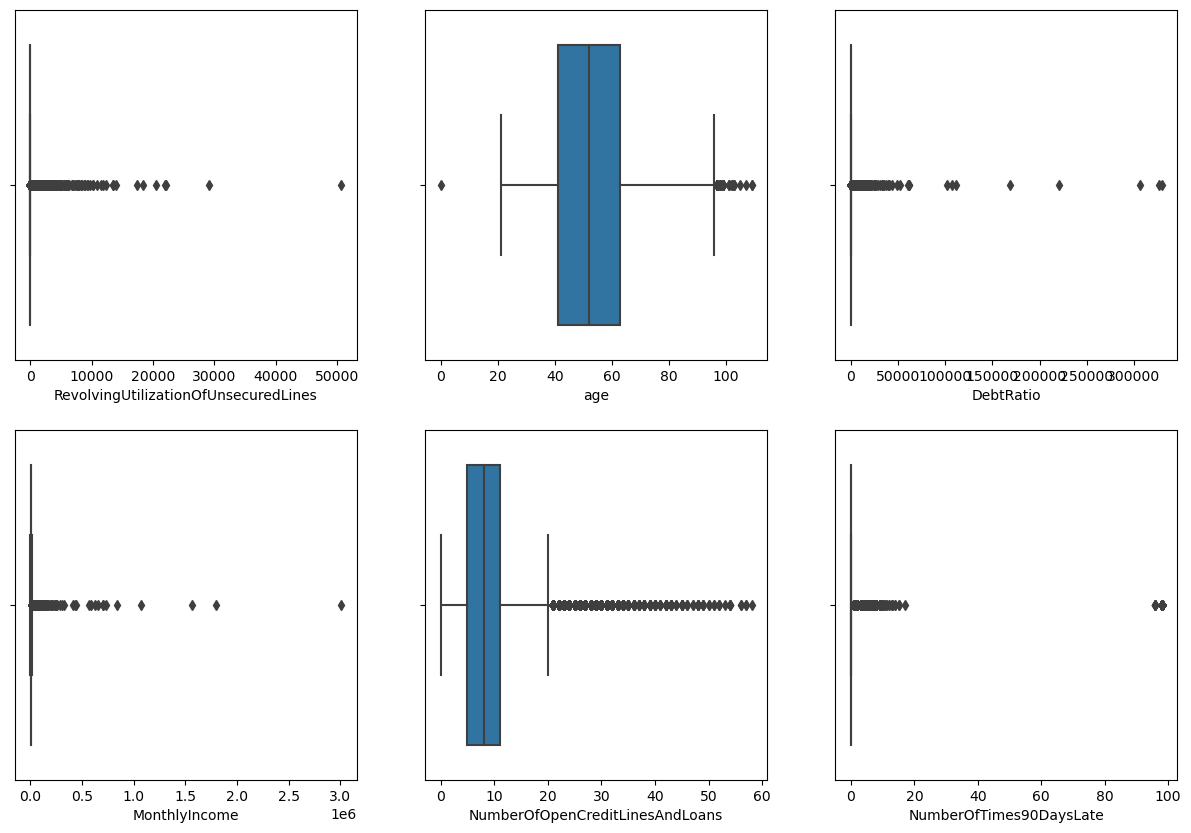

In [ ]:
# make subplot for all variables to check for outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x=df.RevolvingUtilizationOfUnsecuredLines, ax=axes[0, 0])
sns.boxplot(x=df.age, ax=axes[0, 1])
sns.boxplot(x=df.DebtRatio, ax=axes[0, 2])
sns.boxplot(x=df.MonthlyIncome, ax=axes[1, 0])
sns.boxplot(x=df.NumberOfOpenCreditLinesAndLoans, ax=axes[1, 1])
sns.boxplot(x=df.NumberOfTimes90DaysLate, ax=axes[1, 2])
plt.show()


### Age

In [4]:
# replace when age is 0 with median

df.loc[df.age == 0, 'age'] = df.age.median()


C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\2153746949.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


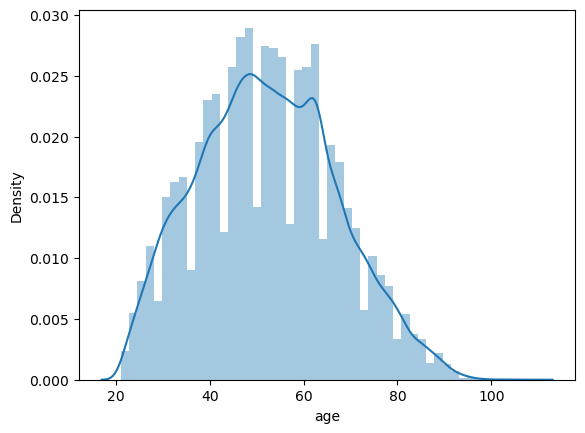

In [297]:
# plot age dist
sns.distplot(df['age'])
plt.show()

In [298]:
# use T score to determine how likely it is for an age above 100 to be an outlier
from scipy.stats import ttest_ind
ttest_ind(df['age'], df['age'] > 100)


Ttest_indResult(statistic=1371.17338387618, pvalue=0.0)

In [5]:
df['age'] = df['age'].clip(upper=100)


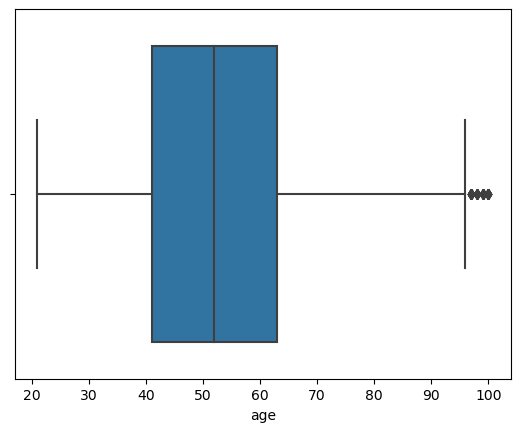

In [300]:
# age boxplot
sns.boxplot(x=df.age)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\2799180019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


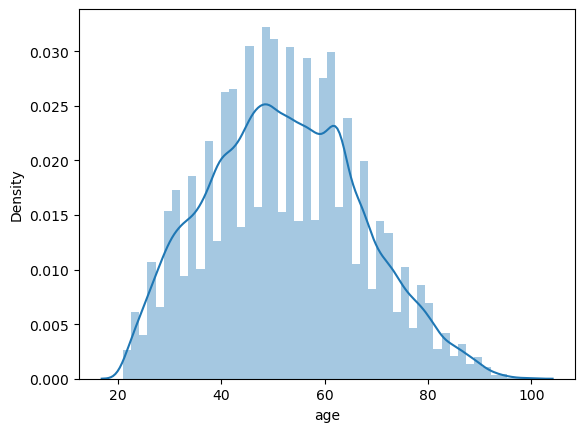

In [301]:
sns.distplot(df['age'])
plt.show()

### Monthly Income

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\3025500376.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'])


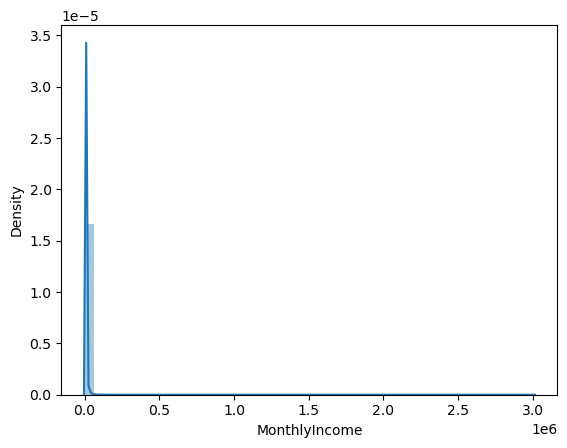

In [302]:
# plot dist of monthly income
sns.distplot(df['MonthlyIncome'])
plt.show()

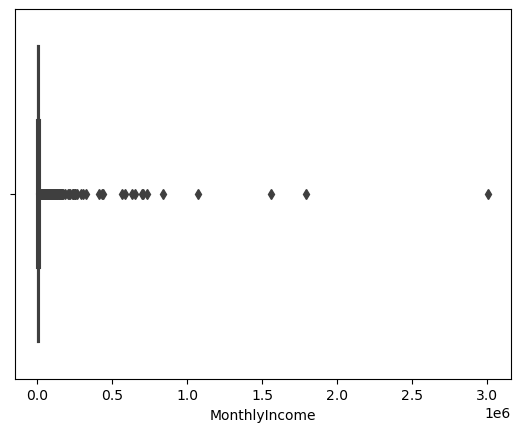

In [303]:
# plot the boxplot for monthly income
sns.boxplot(x=df.MonthlyIncome)
plt.show()

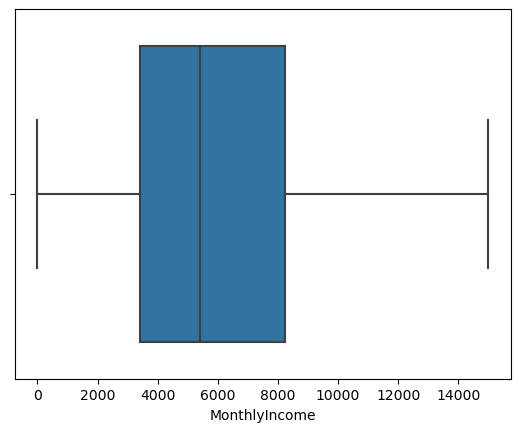

In [6]:
# cap/ winsorize monthly income 
df.loc[df.MonthlyIncome > 15000, 'MonthlyIncome'] = 15000
sns.boxplot(x=df.MonthlyIncome)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\3971867337.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'])


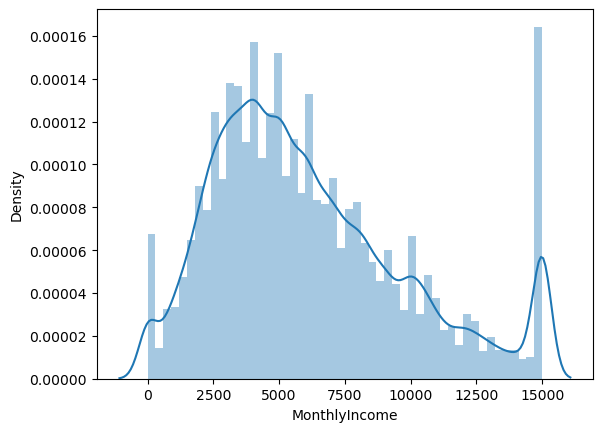

In [305]:
sns.distplot(df['MonthlyIncome'])
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_26280\1385070261.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'])


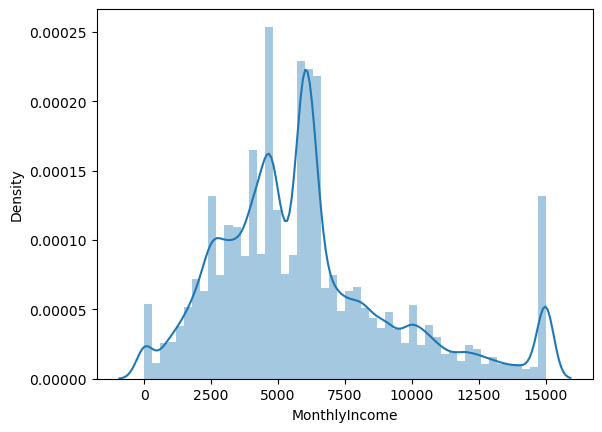

In [7]:
# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate median income for each age group
median_incomes = df.groupby('age_group')['MonthlyIncome'].median()

# Impute missing values
for age_group in labels:
    median_income = median_incomes[age_group]
    df.loc[(df['age_group'] == age_group) & (df['MonthlyIncome'].isnull()), 'MonthlyIncome'] = median_income

# Drop the age_group column if no longer needed
df.drop('age_group', axis=1, inplace=True)

sns.distplot(df['MonthlyIncome'])
plt.show()

In [8]:
#impute any remaining missing values in monthly income with median
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)


0

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\3604040195.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyIncome'])


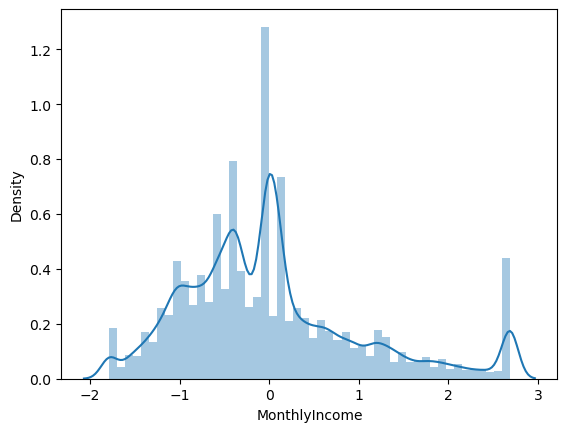

In [276]:
# standardize monthly income using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['MonthlyIncome'] = scaler.fit_transform(df[['MonthlyIncome']])
sns.distplot(df['MonthlyIncome'])
plt.show()

### Dependents

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\2263928766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumberOfDependents'])


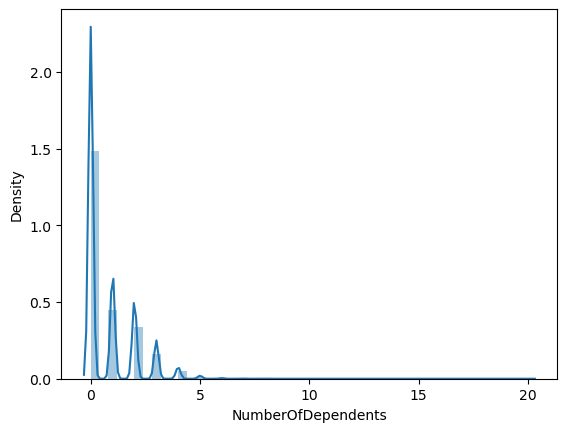

In [307]:
sns.distplot(df['NumberOfDependents'])
plt.show()

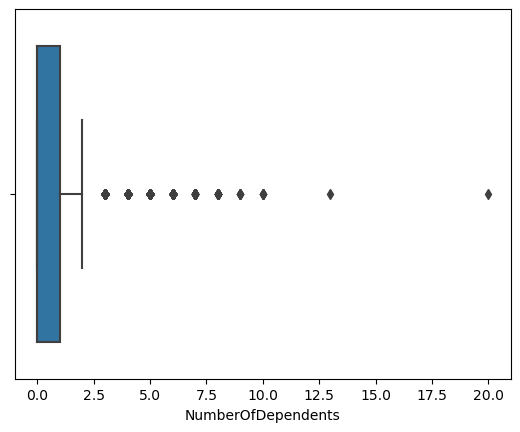

In [278]:
# plot boxplot for number of dependents
sns.boxplot(x=df.NumberOfDependents)
plt.show()

In [279]:
# summary stats for number of dependents
df.NumberOfDependents.describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [280]:
# view counts for number of dependents
df.NumberOfDependents.value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

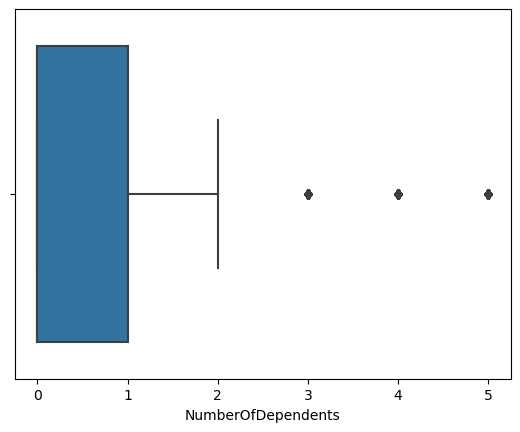

In [9]:
# winsorize number of dependents
df.loc[df.NumberOfDependents > 5, 'NumberOfDependents'] = 5
sns.boxplot(x=df.NumberOfDependents)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_26280\1848479223.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumberOfDependents'], bins=bins)


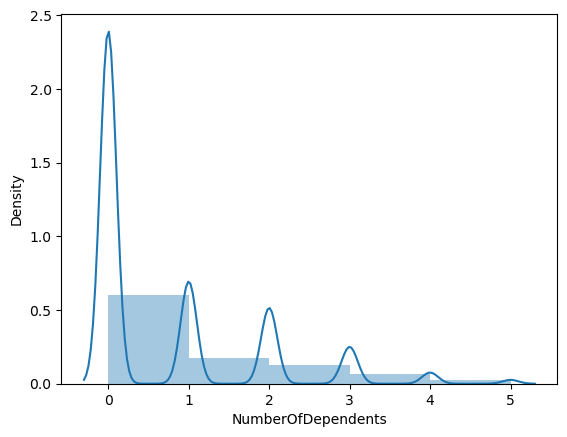

In [10]:
# impute using mediam number of dependents using sklearn SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['NumberOfDependents'] = imputer.fit_transform(df[['NumberOfDependents']])
#large bins for plot
bins = [0, 1, 2, 3, 4, 5]
sns.distplot(df['NumberOfDependents'], bins=bins)
plt.show()

### NumberOfTime90DaysLate

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\2923087821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumberOfTimes90DaysLate'])


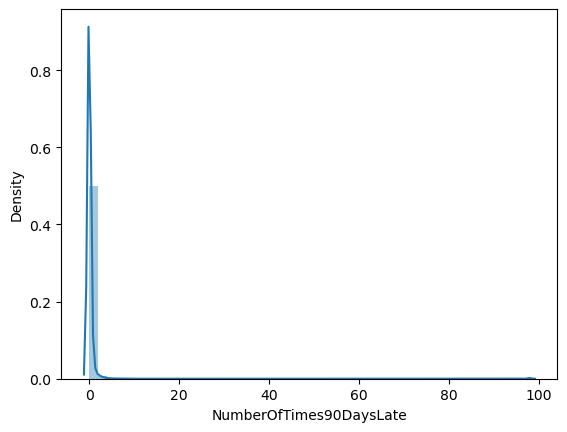

In [241]:
# plot dist of debt ratio
sns.distplot(df['NumberOfTimes90DaysLate'])
plt.show()

In [411]:
# check for missing values
df.isnull().sum()

# check for Nan values
df.isna().sum()


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

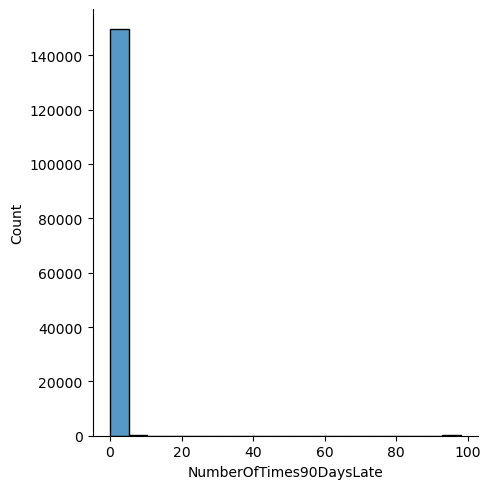

In [11]:
# check cutoff for outliers
df.NumberOfTimes90DaysLate.describe()

# apply robust scaler to number of times 90 days late
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

df['NumberOfTimes90DaysLate'] = robust_scaler.fit_transform(df[['NumberOfTimes90DaysLate']])

# plot dist of debt ratio

sns.displot(df['NumberOfTimes90DaysLate'])

plt.show()




C:\Users\kevin\AppData\Local\Temp\ipykernel_26280\3995214125.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumberOfTimes90DaysLate'])


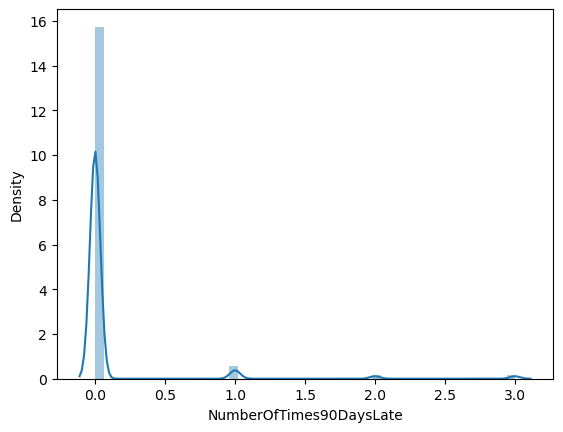

In [12]:
#winsorize number of times 90 days late to the 99th percentile value

# check the 90th percentile value
np.percentile(df['NumberOfTimes90DaysLate'], 99)

# winsorize

df.loc[df.NumberOfTimes90DaysLate > 3, 'NumberOfTimes90DaysLate'] = 3

# plot dist of debt ratio

sns.distplot(df['NumberOfTimes90DaysLate'])

plt.show()



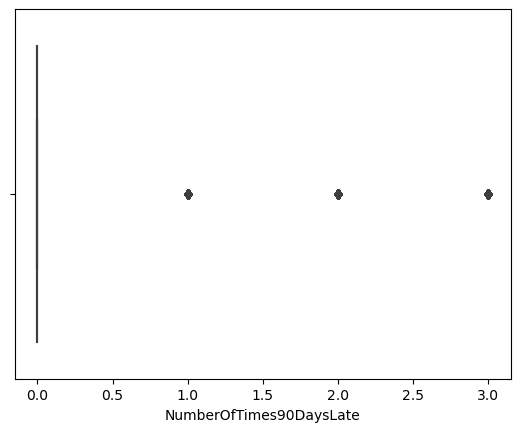

In [422]:
# plot boxplot of debt ratio
sns.boxplot(x=df.NumberOfTimes90DaysLate)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\3328827782.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumberOfTimes90DaysLate'])


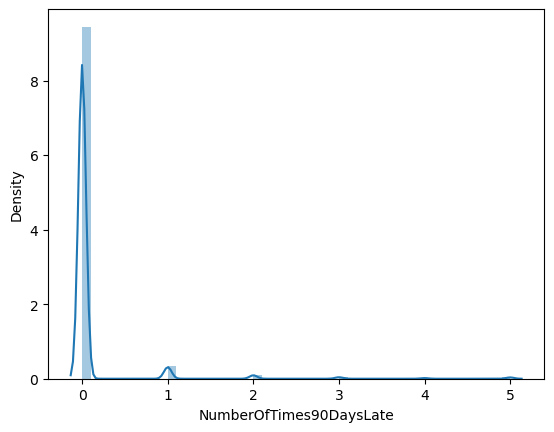

In [387]:
#plot dist of debt ratio

sns.distplot(df['NumberOfTimes90DaysLate'])

plt.show()

In [383]:
# check 95th percentile
df.NumberOfTimes90DaysLate.quantile(.99)

3.0

In [5]:
df.SeriousDlqin2yrs.mean()

0.06684

### NumberOfOpenCreditLinesAndLoans

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\4050654086.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])


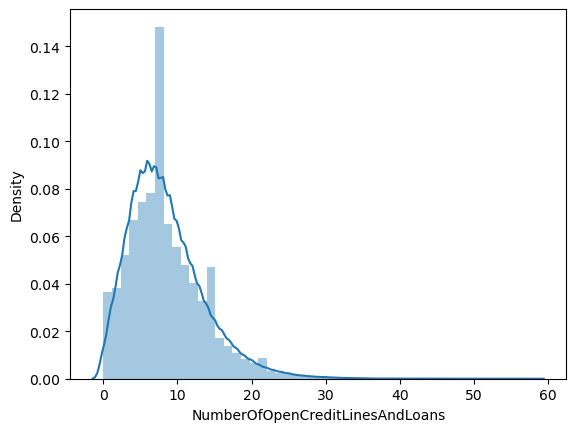

In [423]:
# plot dist of OpenCreditLinesAndLoans

sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])

plt.show()

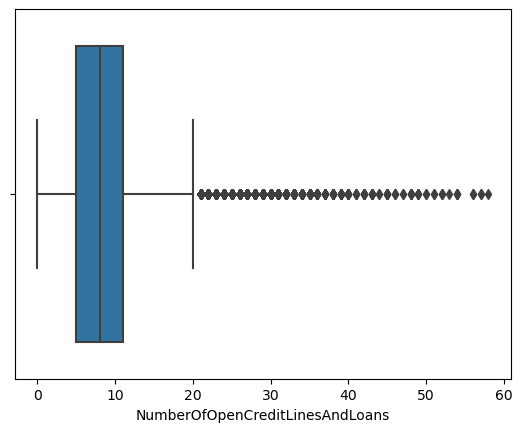

In [424]:
# plot boxplot of OpenCreditLinesAndLoans
sns.boxplot(x=df.NumberOfOpenCreditLinesAndLoans)
plt.show()

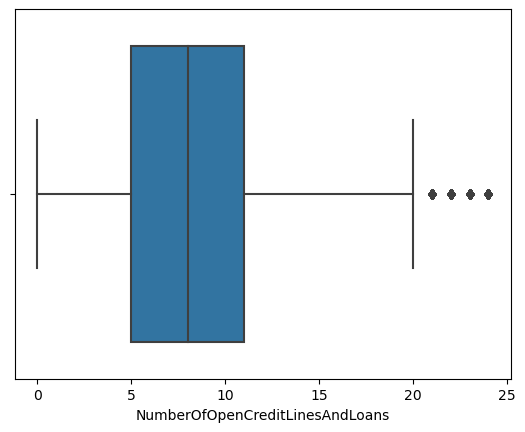

In [13]:
#Check 90th percentile
df.NumberOfOpenCreditLinesAndLoans.quantile(.99)

# winsorize

df.loc[df.NumberOfOpenCreditLinesAndLoans > 24, 'NumberOfOpenCreditLinesAndLoans'] = 24


# plot boxplot of OpenCreditLinesAndLoans
sns.boxplot(x=df.NumberOfOpenCreditLinesAndLoans)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\3818468794.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])


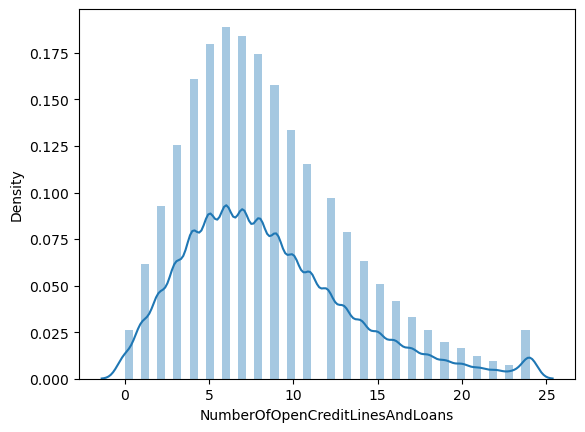

In [440]:
#plot dist of OpenCreditLinesAndLoans

sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])

plt.show()

### DebtRatio

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\2684555814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DebtRatio'])


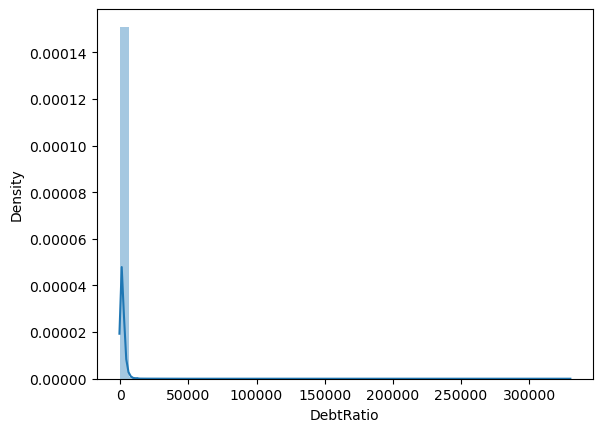

In [442]:
# plot dist of debt ratio

sns.distplot(df['DebtRatio'])

plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_26280\2055000641.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DebtRatio'])


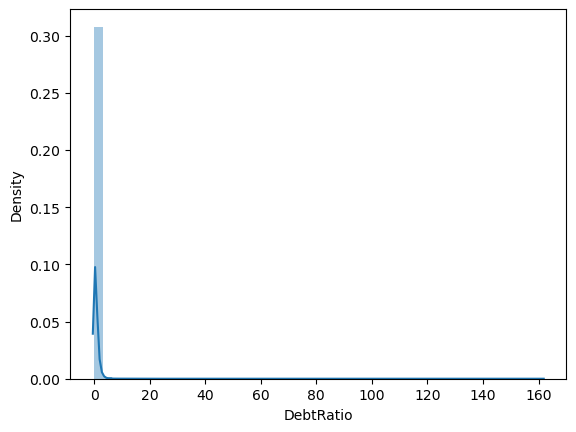

In [15]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

df['DebtRatio'] = standard_scaler.fit_transform(df[['DebtRatio']])

# plot dist of debt ratio

sns.distplot(df['DebtRatio'])

plt.show()

In [446]:
# check 99th percentile
df.DebtRatio.quantile(.99)



1.0285518004256158

In [16]:
# winsorize debt ratio

df.loc[df.DebtRatio > 2, 'DebtRatio'] = 2

# plot dist of debt ratio

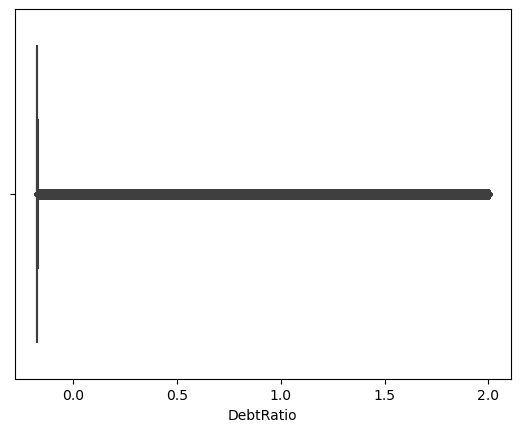

In [448]:
# box plot
sns.boxplot(x=df.DebtRatio)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\3288983260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DebtRatio'])


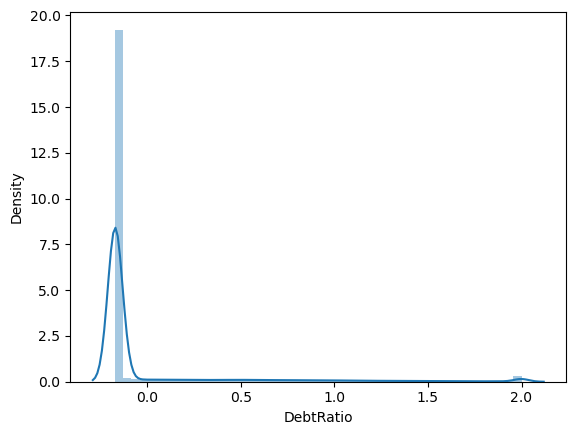

In [449]:
sns.distplot(df['DebtRatio'])

plt.show()

### RevolvingUtilizationOfUnsecuredLines


C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\1229632137.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])


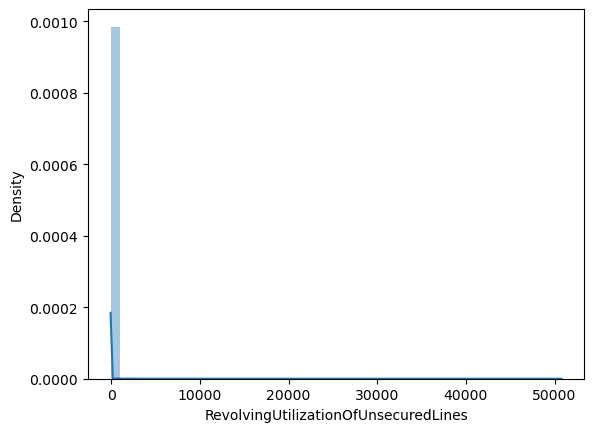

In [450]:
# plot dist of RevolvingUtilizationOfUnsecuredLines

sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])

plt.show()



C:\Users\kevin\AppData\Local\Temp\ipykernel_26280\700743917.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])


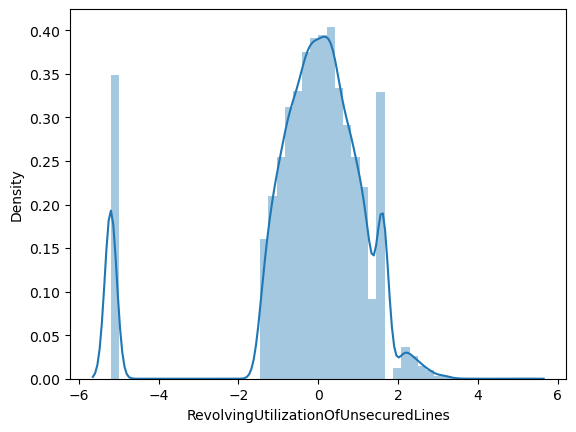

In [17]:
# try a quantile transformer to normalize the data
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')

df['RevolvingUtilizationOfUnsecuredLines'] = quantile_transformer.fit_transform(df[['RevolvingUtilizationOfUnsecuredLines']])

# plot dist of RevolvingUtilizationOfUnsecuredLines

sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])

plt.show()

### Data Imbalance

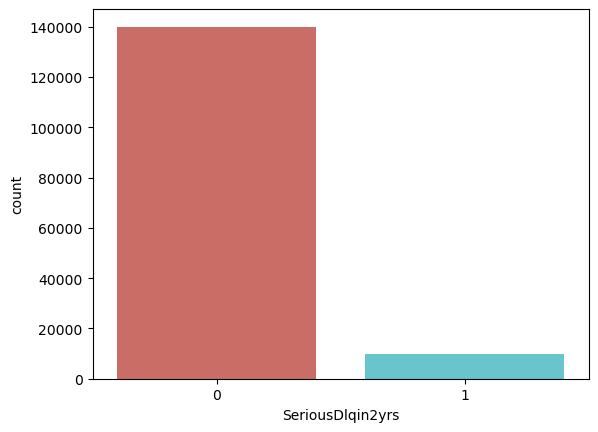

In [310]:
# plot the distribution of the target variable to see if there is a class imbalance
sns.countplot(x='SeriousDlqin2yrs', data=df, palette='hls')
plt.show()


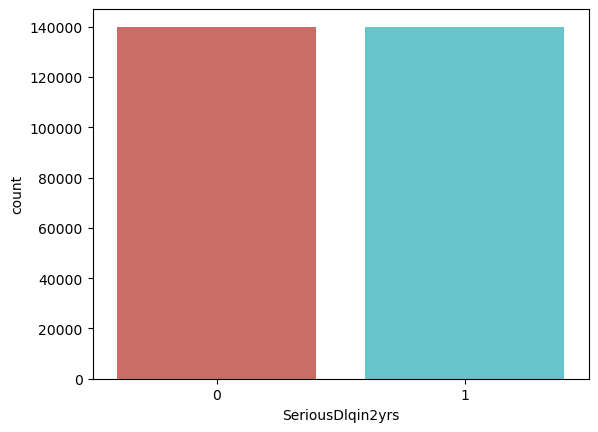

In [18]:
majority = df[df.SeriousDlqin2yrs==0]
minority = df[df.SeriousDlqin2yrs==1]

# upsample minority class
df_upsampled = resample(minority, replace=True, n_samples=139974, random_state=47)

df_upsampled = pd.concat([majority, df_upsampled])
#plot new class counts
sns.countplot(x='SeriousDlqin2yrs', data=df_upsampled, palette='hls')
plt.show()

Text(0.5, 1.0, 'SeriousDlqin2yrs = 1')

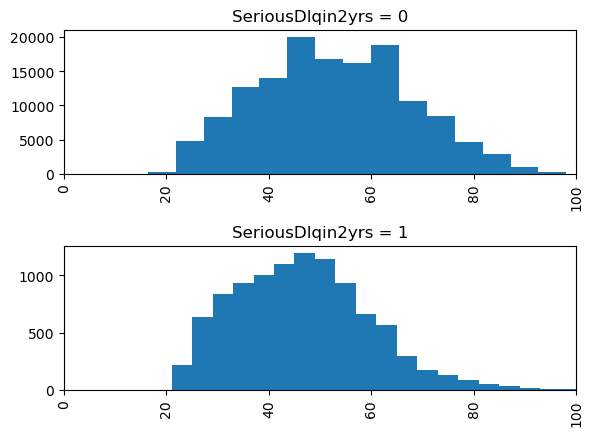

In [8]:
age_hist = df['age'].hist(by=df['SeriousDlqin2yrs'], bins=20, layout=(2,1))
age_hist[0].set_xlim((0,100))
age_hist[0].set_title('SeriousDlqin2yrs = 0')
age_hist[1].set_xlim((0,100))
age_hist[1].set_title('SeriousDlqin2yrs = 1')

In [9]:
# chance of outliers?
df.DebtRatio.quantile([.975])

0.975    3489.025
Name: DebtRatio, dtype: float64

In [10]:
# check monthly income and dependents have missing values
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

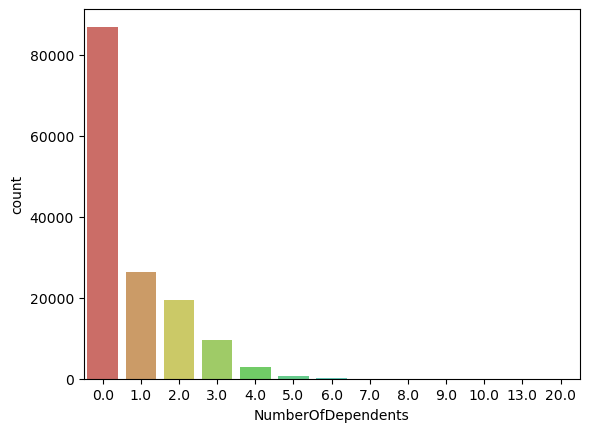

In [11]:
# plot the distribution of dependents sns
sns.countplot(x='NumberOfDependents', data=df, palette='hls')
plt.show()

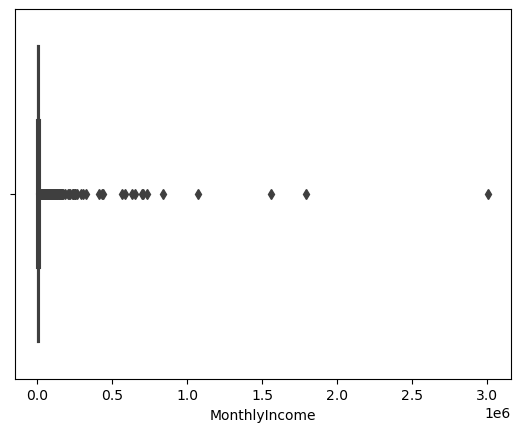

In [12]:
# check for outliers in monthly income
sns.boxplot(x=df.MonthlyIncome)
plt.show()

In [14]:
# check Number of times 90 days late
df.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

C:\Users\kevin\AppData\Local\Temp\ipykernel_34876\3114159400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.RevolvingUtilizationOfUnsecuredLines)


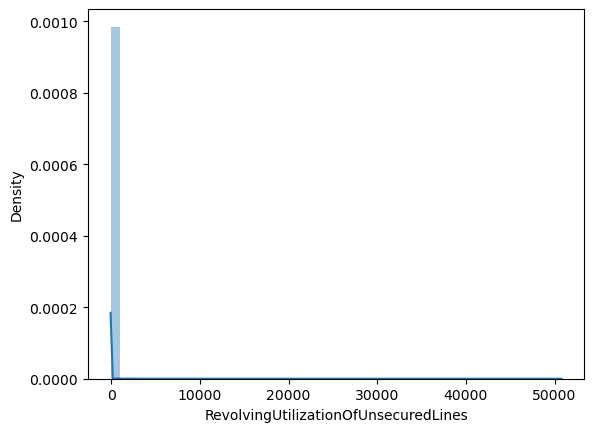

In [11]:
sns.distplot(df.RevolvingUtilizationOfUnsecuredLines)
plt.show()

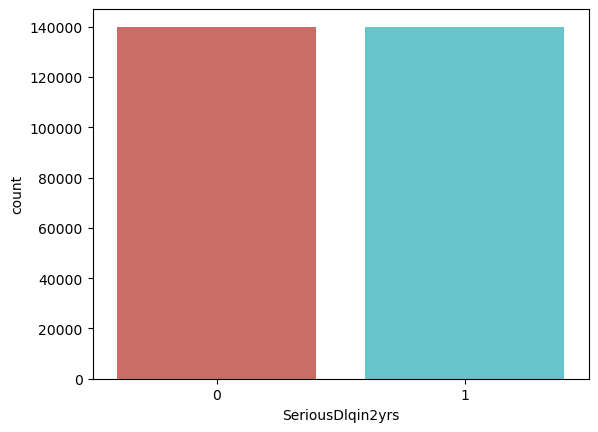

In [284]:
# upsample minority class

majority = df[df.SeriousDlqin2yrs==0]

minority = df[df.SeriousDlqin2yrs==1]

df_upsampled = resample(minority, replace=True, n_samples=139974, random_state=47)

df_upsampled = pd.concat([majority, df_upsampled])

sns.countplot(x='SeriousDlqin2yrs', data=df_upsampled, palette='hls')
plt.show()

# Model Building

In [20]:
# train test split
X = df_upsampled.drop('SeriousDlqin2yrs', axis=1)
y = df_upsampled['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# train a random forest classifier
rf= RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=1)
rf.fit(X_train, y_train)

# print auc
y_pred = rf.predict_proba(X_test)[:,1]
print(metrics.roc_auc_score(y_test, y_pred))




0.8881879257561865


In [363]:
#use Guassian Process Optimisation to find best parameters

from skopt import gp_minimize

def objective(params):

    n_estimators = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_leaf=min_samples_leaf,
                                random_state=47)

    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_test)[:,1]
    score = metrics.roc_auc_score(y_test, y_pred)

    return -score

space = [(10, 200), # n_estimators
            (1, 20), # max_depth
            (1, 10)] # min_samples_leaf

res = gp_minimize(objective, space, n_calls=50, random_state=47)

print("Best score=%.4f" % res.fun)

print("""Best parameters:
- n_estimators=%d
- max_depth=%d
- min_samples_leaf=%d""" % (res.x[0], res.x[1], res.x[2]))



c:\Users\kevin\anaconda3\envs\TF\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\kevin\anaconda3\envs\TF\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\kevin\anaconda3\envs\TF\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\kevin\anaconda3\envs\TF\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\kevin\anaconda3\envs\TF\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The object

Best score=-0.9952
Best parameters:
- n_estimators=193
- max_depth=20
- min_samples_leaf=1


In [21]:
rfbest= RandomForestClassifier(n_estimators=193, max_depth=12, min_samples_leaf=1)
rfbest.fit(X_train, y_train)

# print auc
y_pred = rfbest.predict_proba(X_test)[:,1]
print(metrics.roc_auc_score(y_test, y_pred))


0.9112682396224215


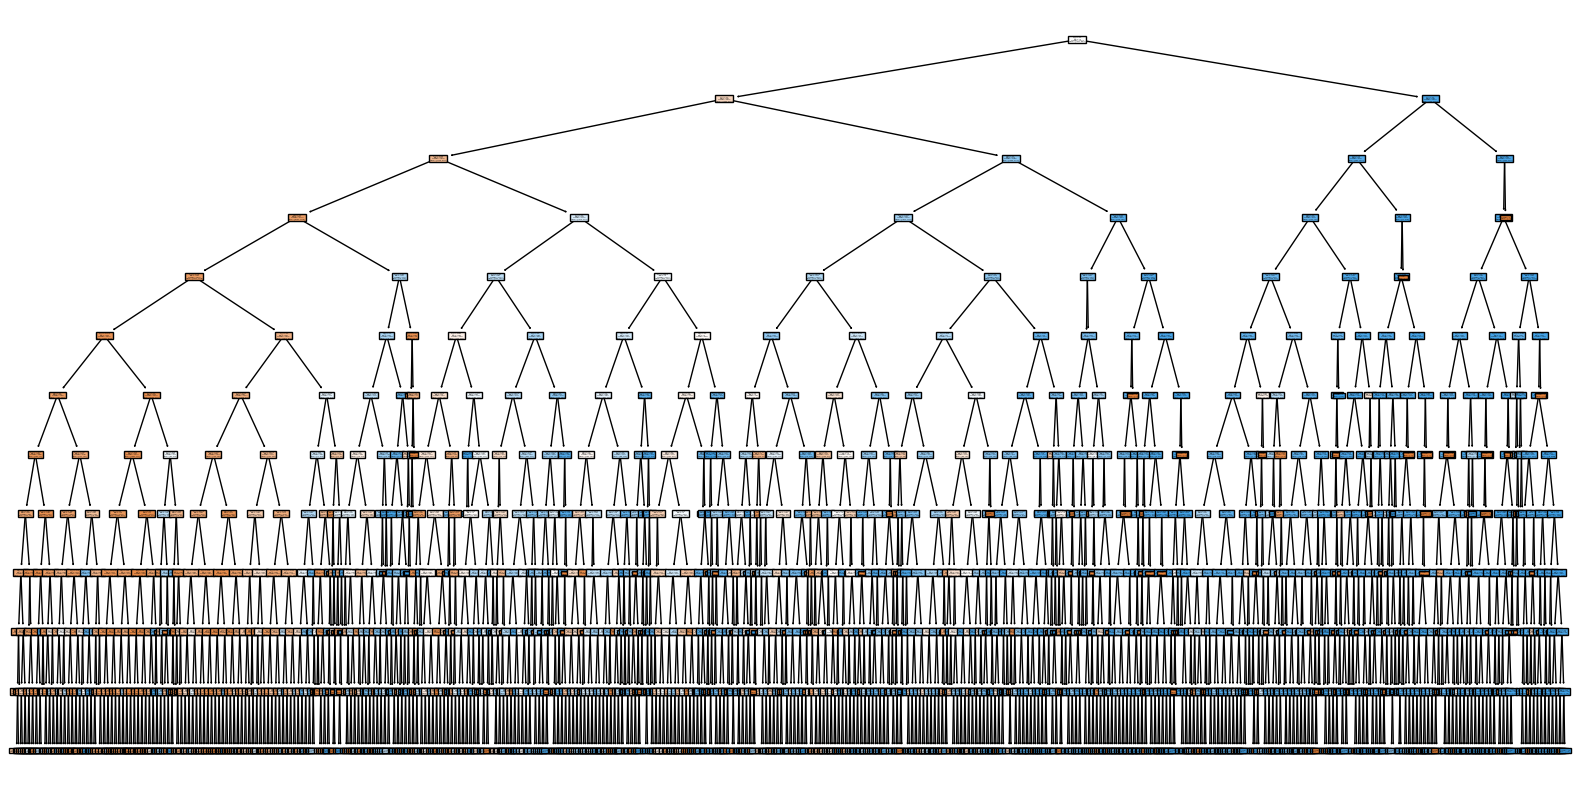

In [22]:
# display random forest graphically using sklearn tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(rfbest.estimators_[0], filled=True)
plt.show()


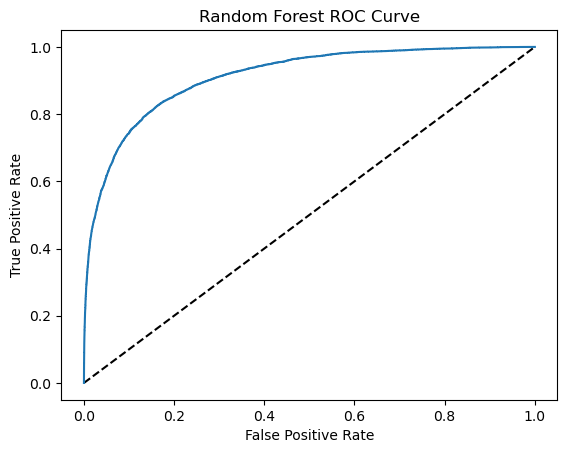

In [27]:
# plot ROC curve
from sklearn.metrics import roc_curve

y_pred_prob = rfbest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr, tpr, label='Random Forest')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Random Forest ROC Curve')

plt.show()



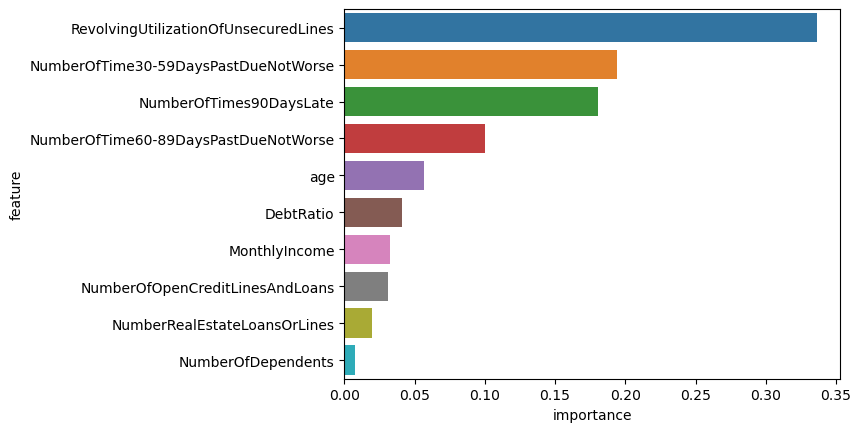

In [454]:
# plot feature importance

feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rfbest.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False, inplace=True)

feature_importance.head(10)

sns.barplot(x='importance', y='feature', data=feature_importance.head(10))

plt.show()


In [478]:
df_test = pd.read_csv('cs-test.csv')
df_test.head()


# check for missing values
df_test.isnull().sum()
# replace when age is 0 with median

df_test.loc[df_test.age == 0, 'age'] = df.age.median()
df_test['age'] = df_test['age'].clip(upper=100)
df_test.loc[df_test.MonthlyIncome > 15000, 'MonthlyIncome'] = 15000

# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df_test['age_group'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)

# Calculate median income for each age group
median_incomes = df_test.groupby('age_group')['MonthlyIncome'].median()

# Impute missing values
for age_group in labels:
    median_income = median_incomes[age_group]
    df_test.loc[(df_test['age_group'] == age_group) & (df_test['MonthlyIncome'].isnull()), 'MonthlyIncome'] = median_income

# Drop the age_group column if no longer needed
df_test.drop('age_group', axis=1, inplace=True)


df_test.loc[df_test.NumberOfDependents > 5, 'NumberOfDependents'] = 5

# impute using mediam number of dependents using sklearn SimpleImputer

imputer = SimpleImputer(strategy='median')
df_test['NumberOfDependents'] = imputer.fit_transform(df_test[['NumberOfDependents']])


# impute missing values for monthly income with median

df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(), inplace=True)

# check if there are any missing values left
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')

df_test['RevolvingUtilizationOfUnsecuredLines'] = quantile_transformer.fit_transform(df_test[['RevolvingUtilizationOfUnsecuredLines']])


# winsorize debt ratio

df_test.loc[df_test.DebtRatio > 2, 'DebtRatio'] = 2



# winsorize

df_test.loc[df_test.NumberOfOpenCreditLinesAndLoans > 24, 'NumberOfOpenCreditLinesAndLoans'] = 24






df_test.loc[df_test.NumberOfTimes90DaysLate > 3, 'NumberOfTimes90DaysLate'] = 3



from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

df_test['NumberOfTimes90DaysLate'] = robust_scaler.fit_transform(df_test[['NumberOfTimes90DaysLate']])


# plot dist of debt ratio


# drop unnamed column and save for later

df_test_id = df_test['Unnamed: 0']

df_test.drop('Unnamed: 0', axis=1, inplace=True)

df_test.head()

#drop predictor variable
df_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)


# get prediction probabilities for test set without the index column

#y_pred_prob = rf.predict_proba(df_test)[:,1]
y_pred_prob = rfbest.predict_proba(df_test)[:,1]

df_submission = pd.DataFrame(df_test_id)
df_submission.head()
#change first column name to Id
df_submission.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
df_submission.head()

df_submission['Probability'] = y_pred_prob




df_submission.head()





,Id,Probability
0,1,0.569511
1,2,0.235616
2,3,0.094170
3,4,0.449294
4,5,0.603652


In [479]:
df_submission.to_csv('submissionrf12.csv', index=False)

# Exporting the model and predictions For decision Trees


In [304]:
df_test = pd.read_csv('cs-test.csv')
df_test.head()
# drop target variable
df_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)
df_test.head()

# check for missing values
df_test.isnull().sum()

df_test['NumberOfDependents'].fillna(df_test['NumberOfDependents'].mode()[0], inplace=True)

# impute missing values for monthly income with median

df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(), inplace=True)

# check if there are any missing values left
df_test.isnull().sum()


# get prediction probabilities for test set without the index column
y_pred_prob = rf.predict_proba(df_test.drop('Unnamed: 0', axis=1))



# add t datafram with application id
df_test['Probability'] = y_pred_prob[:,1]

df_test.head()

df_submission = df_test[['Unnamed: 0', 'Probability']]
df_submission.head()
#change first column name to Id
df_submission.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)



df_submission.head()






df_submission.to_csv('submission.csv', index=False)

C:\Users\kevin\AppData\Local\Temp\ipykernel_27020\454482948.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)


## Gradient Boosting


C:\Users\kevin\AppData\Local\Temp\ipykernel_22176\2040137649.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gb_upsampled = gb_upsampled[gb.MonthlyIncome < 10000]


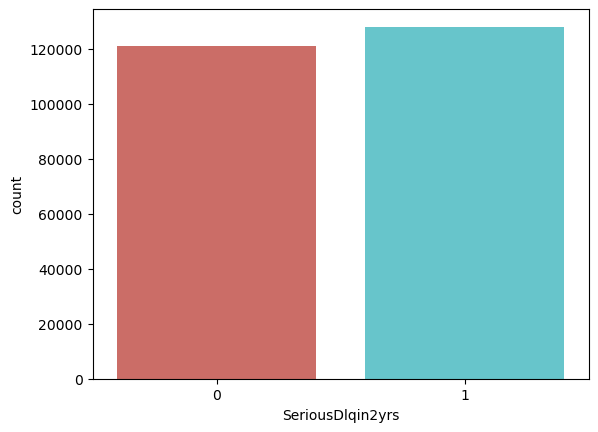

In [3]:
gb = pd.read_csv('cs-training.csv')

# impute missing values for dependents with most freq
gb['NumberOfDependents'].fillna(gb['NumberOfDependents'].mode()[0], inplace=True)

# impute missing values for monthly income with median

gb['MonthlyIncome'].fillna(gb['MonthlyIncome'].median(), inplace=True)


majority = gb[gb.SeriousDlqin2yrs==0]
minority = gb[gb.SeriousDlqin2yrs==1]

# upsample minority class
gb_upsampled = resample(minority, replace=True, n_samples=139974, random_state=47)

gb_upsampled = pd.concat([majority, gb_upsampled])
# check if there are any missing values left
gb_upsampled.isnull().sum()
#drop outlier observations in monthly income
gb_upsampled = gb_upsampled[gb.MonthlyIncome < 10000]


# check class counts
sns.countplot(x='SeriousDlqin2yrs', data=gb_upsampled, palette='hls')
plt.show()

In [4]:
# find best parameters for gradient boosting
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.1, 0.5],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# train test split
Xgb = gb_upsampled.drop('SeriousDlqin2yrs', axis=1)
ygb = gb_upsampled['SeriousDlqin2yrs']

Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, ygb, test_size=0.3, random_state=47)

# grid_search.fit(Xgb_train, ygb_train)

# # check best parameters

# grid_search.best_params_

In [3]:
# use randomserach to find best parameters
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.1, 0.5],
    'max_depth': [5, 10, 15]
}
Xgb = gb_upsampled.drop('SeriousDlqin2yrs', axis=1)
ygb = gb_upsampled['SeriousDlqin2yrs']
Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, ygb, test_size=0.3, random_state=47)
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_grid, cv=3, n_jobs=-1, verbose=1)

random_search.fit(Xgb_train, ygb_train)

# check best parameters

random_search.best_params_






Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.5}

0.9892378166565483

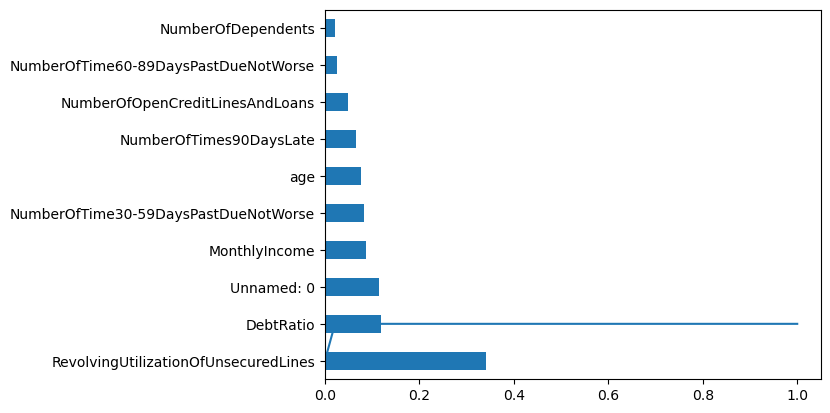

In [5]:
Xgb = gb_upsampled.drop('SeriousDlqin2yrs', axis=1)
ygb = gb_upsampled['SeriousDlqin2yrs']
Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, ygb, test_size=0.3, random_state=47)
#  train a gradient boosting classifier with best parameters
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.5, max_depth=15)
gb.fit(Xgb_train, ygb_train)

# predict on test set
ygb_pred = gb.predict(Xgb_test)

# check accuracy

metrics.accuracy_score(ygb_test, ygb_pred)

# check confusion matrix

metrics.confusion_matrix(ygb_test, ygb_pred)

# plot feature importance

feature_importance = pd.Series(gb.feature_importances_, index=Xgb.columns)


feature_importance.nlargest(10).plot(kind='barh')

# plot ROC curve using sns lineplot

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(ygb_test, ygb_pred)

sns.lineplot(x=fpr, y=tpr)


# print auc

metrics.roc_auc_score(ygb_test, ygb_pred)

<AxesSubplot: >

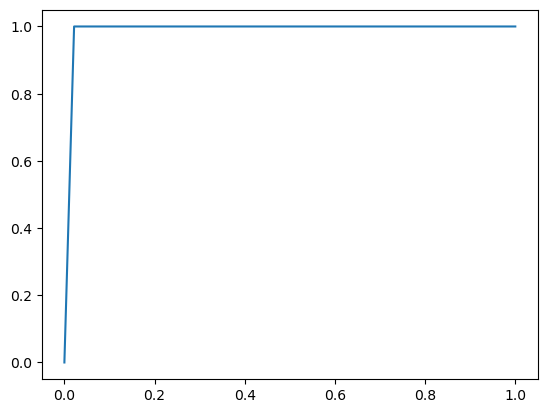

In [6]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(ygb_test, ygb_pred)

sns.lineplot(x=fpr, y=tpr)


# Export Predictions for Gradient Boosting

In [19]:
df_test = pd.read_csv('cs-test.csv')
df_test.head()
# drop target variable
df_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)
df_test.head()

# check for missing values
df_test.isnull().sum()

df_test['NumberOfDependents'].fillna(df_test['NumberOfDependents'].mode()[0], inplace=True)

# impute missing values for monthly income with median

df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(), inplace=True)

# check if there are any missing values left
df_test.isnull().sum()

df_test.head()
# # get prediction probabilities for test set without the index column
y_pred_prob = gb.predict_proba(df_test)
y_pred_prob
df_submission = df_test[['Unnamed: 0']]
df_submission.head()
#change first column name to Id
df_submission.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
df_submission.head()

df_submission['Probability'] = y_pred_prob[:,1]




df_submission.head()






df_submission.to_csv('submissiongb.csv', index=False)


C:\Users\kevin\AppData\Local\Temp\ipykernel_22176\4180032406.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_22176\4180032406.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission['Probability'] = y_pred_prob[:,1]


# Guassian Process Classifier

In [20]:
# import Gaussian Process Classifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import data
df = pd.read_csv('cs-training.csv', index_col=0)

# impute missing values for dependents with most freq

df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0], inplace=True)

# impute missing values for monthly income with median

df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

# drop outlier observations in monthly income

df = df[df.MonthlyIncome < 10000]


# upsample minority class

majority = df[df.SeriousDlqin2yrs==0]


minority = df[df.SeriousDlqin2yrs==1]


df_upsampled = resample(minority, replace=True, n_samples=139974, random_state=47)


df_upsampled = pd.concat([majority, df_upsampled])


# train test split

X = df_upsampled.drop('SeriousDlqin2yrs', axis=1)

y = df_upsampled['SeriousDlqin2yrs']

Xgp_train, Xgp_test, ygp_train, ygp_test = train_test_split(X, y, test_size=0.3, random_state=47)

# train a gaussian process classifier

kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel, random_state=47)

gpc.fit(Xgp_train, ygp_train)

# see ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(ygp_test, gpc.predict(Xgp_test))

sns.lineplot(x=fpr, y=tpr)

# print auc

metrics.roc_auc_score(ygp_test, gpc.predict(Xgp_test))



MemoryError: Unable to allocate 249. GiB for an array with shape (182713, 182713) and data type float64

# XGBoost

Best Score: -0.994
Best Hyperparameters: [15, 0.45059609761714603, 1, 1.0, 1e-05, 100]


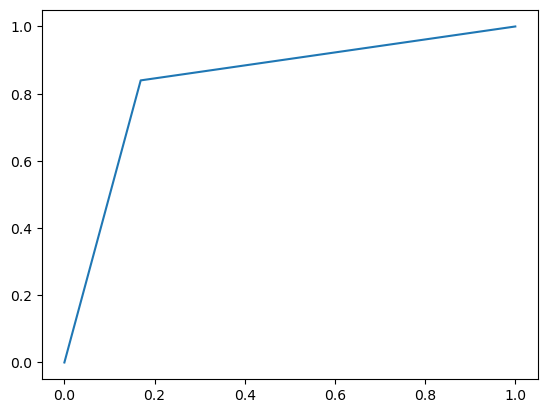

In [347]:
# import xgboost
import xgboost as xgb

# train test split
X = df_upsampled.drop('SeriousDlqin2yrs', axis=1)
y = df_upsampled['SeriousDlqin2yrs']

Xxgb_train, Xxgb_test, yxgb_train, yxgb_test = train_test_split(X, y, test_size=0.3, random_state=47)

# train a xgboost classifier

xgbc = xgb.XGBClassifier()

xgbc.fit(Xxgb_train, yxgb_train)

# see AUC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(yxgb_test, xgbc.predict(Xxgb_test))

sns.lineplot(x=fpr, y=tpr)

# print auc

metrics.roc_auc_score(yxgb_test, xgbc.predict(Xxgb_test))

#use Guassian Process Optimizer to find best parameters for xgboost

from skopt import gp_minimize

from skopt.space import Real, Integer

from skopt.utils import use_named_args

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score

from sklearn.metrics import make_scorer

# define search space

search_space = [Integer(3, 15, name='max_depth'),

                Real(10**-5, 10**0, "log-uniform", name='learning_rate'),

                Integer(1, 10, name='min_child_weight'),

                Real(10**-5, 10**0, "log-uniform", name='reg_alpha'),

                Real(10**-5, 10**0, "log-uniform", name='reg_lambda'),

                Integer(2, 100, name='n_estimators')]

# define cross validation

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)

# define objective function

@use_named_args(search_space)

def evaluate_model(**params):

    xgbc = xgb.XGBClassifier(**params)

    return -np.mean(cross_val_score(xgbc, Xxgb_train, yxgb_train, cv=cv, n_jobs=-1, scoring="roc_auc"))

# run optimization

result = gp_minimize(evaluate_model, search_space, n_calls=50, n_random_starts=10, random_state=47)

# summarize best parameters

print('Best Score: %.3f' % result.fun)

print('Best Hyperparameters: %s' % result.x)



0.8974968587744863

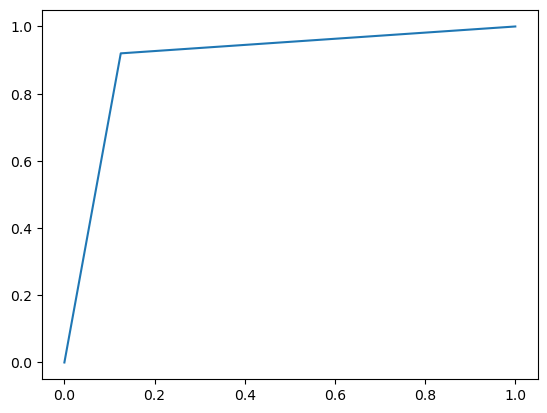

In [355]:
# train a xgboost classifier with best parameters

xgbc = xgb.XGBClassifier(max_depth=15, learning_rate=0.01, min_child_weight=1, reg_alpha=0.0001, reg_lambda=0.0001, n_estimators=100)

xgbc.fit(Xxgb_train, yxgb_train)

# see AUC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(yxgb_test, xgbc.predict(Xxgb_test))

sns.lineplot(x=fpr, y=tpr)

# print auc

metrics.roc_auc_score(yxgb_test, xgbc.predict(Xxgb_test))



In [356]:
df_test = pd.read_csv('cs-test.csv')
df_test.head()


# check for missing values
df_test.isnull().sum()
# replace when age is 0 with median

df_test.loc[df_test.age == 0, 'age'] = df.age.median()
df_test['age'] = df_test['age'].clip(upper=100)
df_test.loc[df_test.MonthlyIncome > 15000, 'MonthlyIncome'] = 15000

# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df_test['age_group'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)

# Calculate median income for each age group
median_incomes = df_test.groupby('age_group')['MonthlyIncome'].median()

# Impute missing values
for age_group in labels:
    median_income = median_incomes[age_group]
    df_test.loc[(df_test['age_group'] == age_group) & (df_test['MonthlyIncome'].isnull()), 'MonthlyIncome'] = median_income

# Drop the age_group column if no longer needed
df_test.drop('age_group', axis=1, inplace=True)


df_test.loc[df_test.NumberOfDependents > 5, 'NumberOfDependents'] = 5

# impute using mediam number of dependents using sklearn SimpleImputer

imputer = SimpleImputer(strategy='median')
df_test['NumberOfDependents'] = imputer.fit_transform(df_test[['NumberOfDependents']])


# impute missing values for monthly income with median

df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(), inplace=True)

# check if there are any missing values left

# drop unnamed column and save for later

df_test_id = df_test['Unnamed: 0']

df_test.drop('Unnamed: 0', axis=1, inplace=True)

df_test.head()

#drop predictor variable
df_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)


# get prediction probabilities for test set without the index column

y_pred_prob = xgbc.predict_proba(df_test)

df_submission = pd.DataFrame(df_test_id)
df_submission.head()
#change first column name to Id
df_submission.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
df_submission.head()

df_submission['Probability'] = y_pred_prob[:,0]




df_submission.head()

,Id,Probability
0,1,0.459029
1,2,0.770807
2,3,0.805197
3,4,0.763072
4,5,0.386588


In [354]:
df_submission.to_csv('submissionxgb.csv', index=False)

# Deep Learning

In [24]:

# import tensor flow
import tensorflow as tf
# import batch normalization
from keras.layers import BatchNormalization
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout, Attention
from keras.regularizers import l1, l2
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from keras.optimizers import Adam
#import data 


# train test split

# train test validation split

X = df_upsampled.drop('SeriousDlqin2yrs', axis=1)

y = df_upsampled['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)




X_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [26]:

# build a neural network

model = Sequential(
    [
        Dense(256, input_dim=10, activation='relu'),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ]
)

# compile model with low learning rate

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# fit model

model.fit(X_train, y_train, epochs=5, batch_size=32)

# evaluate model

model.evaluate(X_test, y_test)

# predict on test set

y_pred = model.predict(X_test)

# check auc

metrics.roc_auc_score(y_test, y_pred)


Epoch 1/5


c:\Users\kevin\anaconda3\envs\TF\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6124/6124 [==============================] - 30s 5ms/step - loss: 0.6927 - accuracy: 0.5149
Epoch 2/5
6124/6124 [==============================] - 36s 6ms/step - loss: 0.6934 - accuracy: 0.4998
Epoch 3/5
6124/6124 [==============================] - 28s 5ms/step - loss: 0.6934 - accuracy: 0.4998
Epoch 4/5
6124/6124 [==============================] - 29s 5ms/step - loss: 0.6934 - accuracy: 0.5010
Epoch 5/5
2625/2625 [==============================] - 6s 2ms/step


0.5000595811704835

In [29]:
# visualize the NN using tensorboard

from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='logs/{}')

model.fit(X_train, y_train, epochs=5, batch_size=32, callbacks=[tensorboard])

# run tensorboard --logdir=logs/ in terminal


Epoch 1/5
6124/6124 [==============================] - 47s 8ms/step - loss: 0.6934 - accuracy: 0.4989
Epoch 2/5
6124/6124 [==============================] - 28s 5ms/step - loss: 0.6933 - accuracy: 0.4999
Epoch 3/5
6124/6124 [==============================] - 26s 4ms/step - loss: 0.6934 - accuracy: 0.5001
Epoch 4/5
6124/6124 [==============================] - 25s 4ms/step - loss: 0.6934 - accuracy: 0.5003
Epoch 5/5
6124/6124 [==============================] - 34s 6ms/step - loss: 0.6934 - accuracy: 0.5002


In [30]:
%load_ext tensorboard
%tensorboard --logdir logs

<AxesSubplot: >

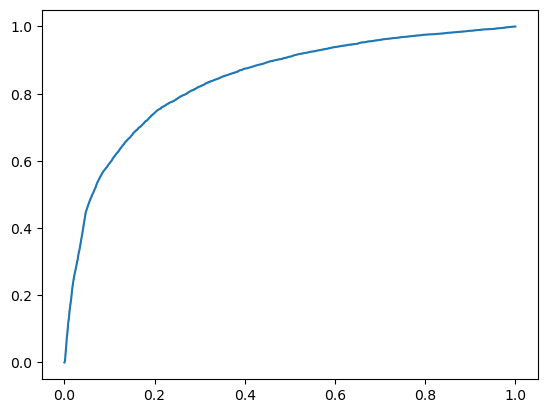

In [328]:
# plot ROC curve using sns lineplot

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

sns.lineplot(x=fpr, y=tpr)

In [337]:
df_test = pd.read_csv('cs-test.csv')
df_test.head()


# check for missing values
df_test.isnull().sum()
# replace when age is 0 with median

df_test.loc[df_test.age == 0, 'age'] = df.age.median()
df_test['age'] = df_test['age'].clip(upper=100)
df_test.loc[df_test.MonthlyIncome > 15000, 'MonthlyIncome'] = 15000

# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df_test['age_group'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)

# Calculate median income for each age group
median_incomes = df_test.groupby('age_group')['MonthlyIncome'].median()

# Impute missing values
for age_group in labels:
    median_income = median_incomes[age_group]
    df_test.loc[(df_test['age_group'] == age_group) & (df_test['MonthlyIncome'].isnull()), 'MonthlyIncome'] = median_income

# Drop the age_group column if no longer needed
df_test.drop('age_group', axis=1, inplace=True)


df_test.loc[df_test.NumberOfDependents > 5, 'NumberOfDependents'] = 5

# impute using mediam number of dependents using sklearn SimpleImputer

imputer = SimpleImputer(strategy='median')
df_test['NumberOfDependents'] = imputer.fit_transform(df_test[['NumberOfDependents']])


# impute missing values for monthly income with median

df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(), inplace=True)

# check if there are any missing values left

# drop unnamed column and save for later

df_test_id = df_test['Unnamed: 0']

df_test.drop('Unnamed: 0', axis=1, inplace=True)

df_test.head()

#drop predictor variable
df_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)


# get prediction probabilities for test set without the index column

y_pred_prob = model.predict(df_test)

df_submission = pd.DataFrame(df_test_id)
df_submission.head()
#change first column name to Id
df_submission.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
df_submission.head()

df_submission['Probability'] = y_pred_prob[:,0]




df_submission.head()






# df_submission.to_csv('submissiongb.csv', index=False)

3172/3172 [==============================] - 5s 2ms/step


,Id,Probability
0,1,0.701582
1,2,0.683642
2,3,0.488926
3,4,0.821051
4,5,0.815125


In [338]:
df_submission.to_csv('submissionnn3.csv', index=False)